# Problem Statement

ABC is an online content sharing platform that enables users to create, upload and share the content in the form of videos. It includes videos from different genres like entertainment, education, sports, technology and so on. The maximum duration of video is 10 minutes.

Users can like, comment and share the videos on the platform. 

Based on the user’s interaction with the videos, engagement score is assigned to the video with respect to each user. Engagement score defines how engaging the content of the video is. 

Understanding the engagement score of the video improves the user’s interaction with the platform. It defines the type of content that is appealing to the user and engages the larger audience.

# Steps involved

Imported Libraies
Preprocessing
Feature Engineering
    #missing value handling
    #Feature reduction
    #label Encoding
model Building

# Importing important Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Reading dataset

In [2]:
test=pd.read_csv(r'C:\Users\HP\Downloads\test_1zqHu22.csv')
train=pd.read_csv(r'C:\Users\HP\Downloads\train_0OECtn8.csv')

In [3]:
#checking wheather both are correctly printed
test.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views
0,89198,7986,12,42,14,Male,Student,180,138
1,89199,11278,34,115,14,Male,Student,230,840
2,89200,17245,8,110,44,Female,Working Professional,280,628
3,89201,9851,16,137,18,Male,Student,270,462
4,89202,16008,34,96,47,Female,Other,230,840


In [4]:
train.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,1,19990,37,128,24,Male,Student,180,1000,4.33
1,2,5304,32,132,14,Female,Student,330,714,1.79
2,3,1840,12,24,19,Male,Student,180,138,4.35
3,4,12597,23,112,19,Male,Student,220,613,3.77
4,5,13626,23,112,27,Male,Working Professional,220,613,3.13


In [5]:
#checking for Null values
test.isna().sum()

row_id         0
user_id        0
category_id    0
video_id       0
age            0
gender         0
profession     0
followers      0
views          0
dtype: int64

There is no null values in test Dataset

In [6]:
train.isna().sum()

row_id              0
user_id             0
category_id         0
video_id            0
age                 0
gender              0
profession          0
followers           0
views               0
engagement_score    0
dtype: int64

There is no null values in train dataset.

In [7]:
#finding main Information about dataset
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11121 entries, 0 to 11120
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   row_id       11121 non-null  int64 
 1   user_id      11121 non-null  int64 
 2   category_id  11121 non-null  int64 
 3   video_id     11121 non-null  int64 
 4   age          11121 non-null  int64 
 5   gender       11121 non-null  object
 6   profession   11121 non-null  object
 7   followers    11121 non-null  int64 
 8   views        11121 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 782.1+ KB


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89197 entries, 0 to 89196
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_id            89197 non-null  int64  
 1   user_id           89197 non-null  int64  
 2   category_id       89197 non-null  int64  
 3   video_id          89197 non-null  int64  
 4   age               89197 non-null  int64  
 5   gender            89197 non-null  object 
 6   profession        89197 non-null  object 
 7   followers         89197 non-null  int64  
 8   views             89197 non-null  int64  
 9   engagement_score  89197 non-null  float64
dtypes: float64(1), int64(7), object(2)
memory usage: 6.8+ MB


In [9]:
test.shape,train.shape

((11121, 9), (89197, 10))

we found out that our test data has 11121 rows and 9 columns
and our train dataset has 89197 rows and 10 columns

#  Preprocessing

 # 1.Missing value handling
 There is no missing values which we found earlier

# 2. Outlier Detection and Handling(Data cleaning)

In [10]:
# checking for test dataset
for column in test.columns:
    print(column,test[column].nunique())

row_id 11121
user_id 10384
category_id 23
video_id 128
age 53
gender 2
profession 3
followers 15
views 21


There is no test data with one item

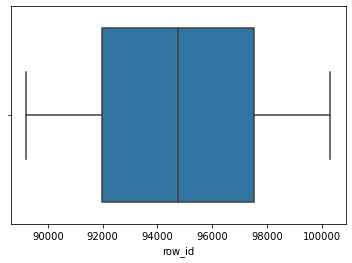

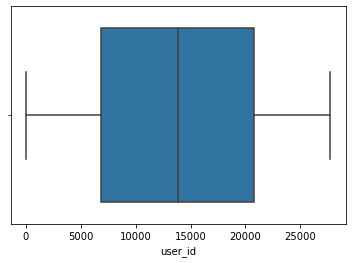

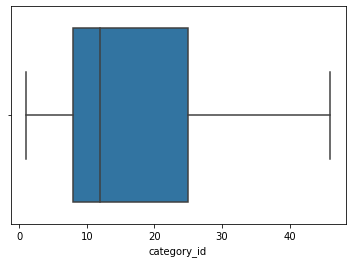

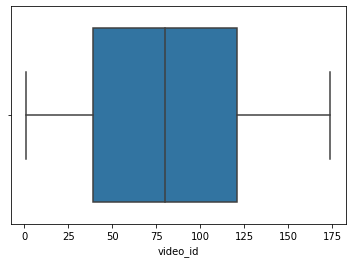

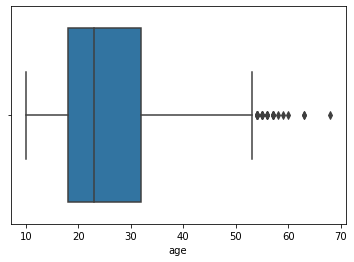

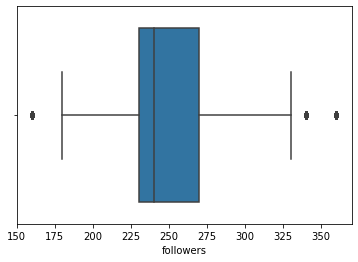

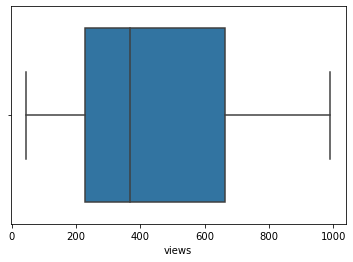

In [11]:

num=test.select_dtypes(include=[np.float64,np.int64])
for i in num:
    sns.boxplot(test[i])
    plt.show()

we found some outlier in age and followers let us remove outliers

In [12]:
#finding interquartile range for Age
age=test['age']
q1=np.percentile(age,25)
q3=np.percentile(age,75)
IQR=q3-q1
low=q1-1.5*IQR
upper=q3+1.5*IQR
print(low,upper)

-3.0 53.0


Since we can have age above 54 we cant consider that as an outlier also less than 70 is possible

In [13]:
#finding interquartile range for Followers
followers=test['followers']
q1=np.percentile(followers,25)
q3=np.percentile(followers,75)
IQR=q3-q1
low=q1-1.5*IQR
upper=q3+1.5*IQR
print(low,upper)

170.0 330.0


330 and 350 is not having huge diffence so we are noot handling this outlier

In [14]:
#checking for test dataset
for column in train.columns:
    print(column,train[column].nunique())

row_id 89197
user_id 27734
category_id 47
video_id 175
age 58
gender 2
profession 3
followers 17
views 43
engagement_score 229


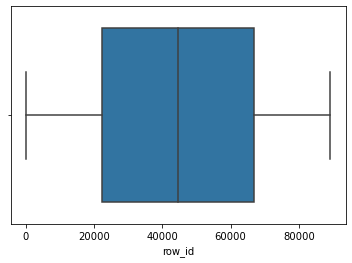

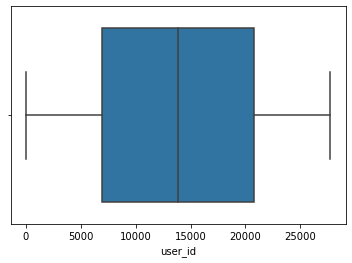

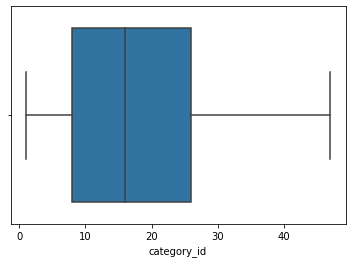

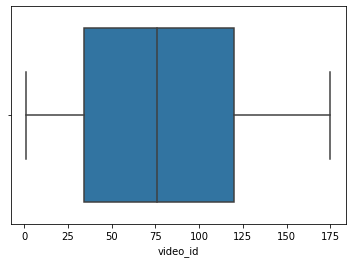

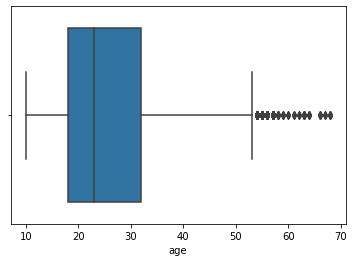

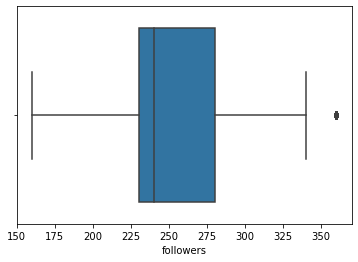

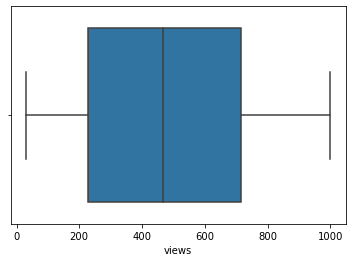

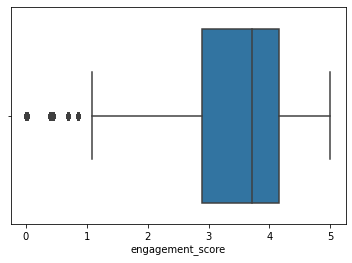

In [15]:
num1=train.select_dtypes(include=[np.float64,np.int64])
for i in num1:
    sns.boxplot(train[i])
    plt.show()

here we dont consider the outlier of age beacuse age can be below
80 which is normal also engament score which is our target feature

In [16]:
#finding interquartile range for Followers
followers=train['followers']
q1=np.percentile(followers,25)
q3=np.percentile(followers,75)
IQR=q3-q1
low=q1-1.5*IQR
upper=q3+1.5*IQR
print(low,upper)

155.0 355.0


so we cant condier follower having outlier

#  feature reduction

<AxesSubplot:>

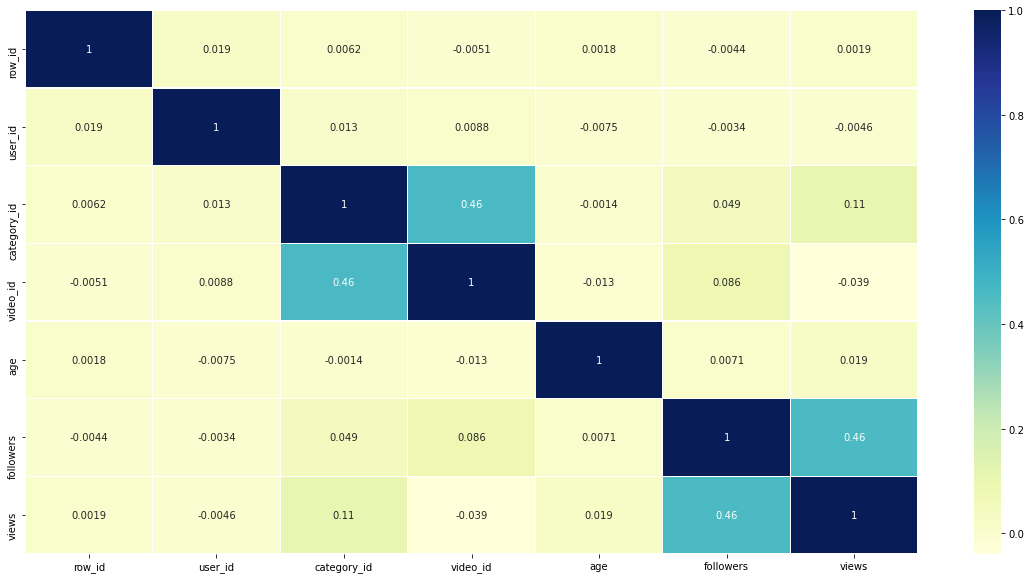

In [17]:
corrmatrix =test.corr()
plt.subplots(figsize=(20,10))
sns.heatmap(corrmatrix,annot=True,linewidth=.2,cmap='YlGnBu')

In [18]:
#we known row id has no importance in feature engineering so let us drop it
dftest=test.drop(['row_id','user_id'],axis=1)
#since we have only 8 other features we are not doing feature reduction

<AxesSubplot:>

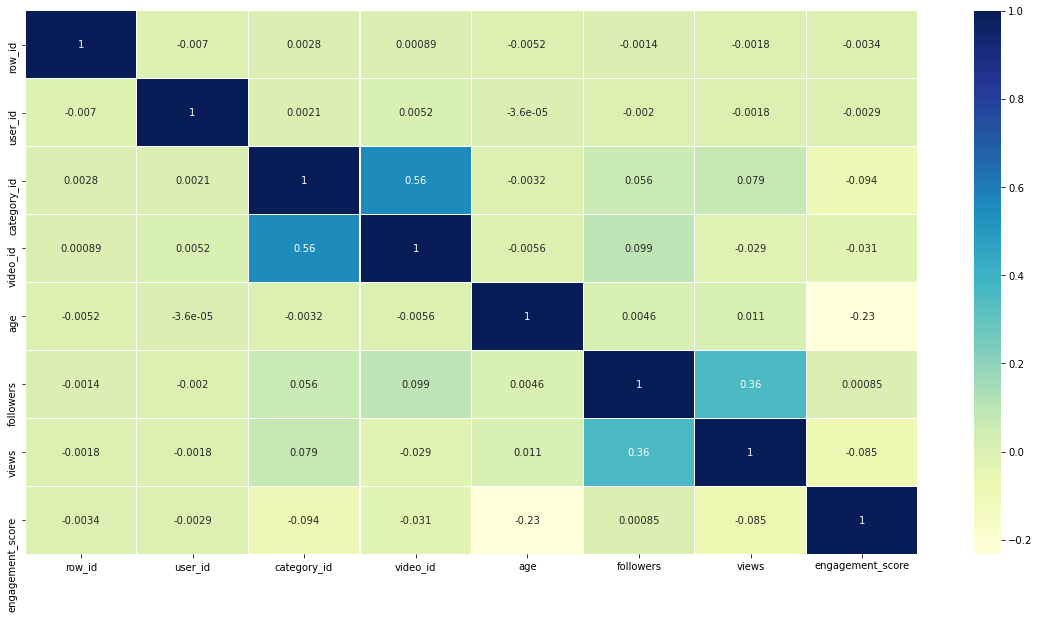

In [19]:
corrmatrix =train.corr()
plt.subplots(figsize=(20,10))
sns.heatmap(corrmatrix,annot=True,linewidth=.2,cmap='YlGnBu')

In [20]:
#we known row id and user id has no importance in feature engineering so let us drop it
dftrain=train.drop(['row_id','user_id'],axis=1)
#since we have only 8 other features we are not doing feature reduction

# Checking for Unknown values

In [21]:
for col in test.select_dtypes(include='object').columns:
    print(col)
    print(test[col].unique())

gender
['Male' 'Female']
profession
['Student' 'Working Professional' 'Other']


there is no unknown values

In [22]:
for col in train.select_dtypes(include='object').columns:
    print(col)
    print(test[col].unique())

gender
['Male' 'Female']
profession
['Student' 'Working Professional' 'Other']


there is no unknown values

#  Exploratory Data Analysis

In [23]:
#1.understanding the data->done
#2.cleaning the data->done

In [24]:
dftest.describe(include='all')

,category_id,video_id,age,gender,profession,followers,views
count,11121.000000,11121.000000,11121.000000,11121,11121,11121.000000,11121.000000
unique,NaN,NaN,NaN,2,3,NaN,NaN
top,NaN,NaN,NaN,Male,Student,NaN,NaN
freq,NaN,NaN,NaN,6377,5572,NaN,NaN
mean,15.666487,79.742559,24.854150,NaN,NaN,249.691574,454.959986
std,10.313259,48.702501,8.953976,NaN,NaN,38.511469,249.759038
min,1.000000,1.000000,10.000000,NaN,NaN,160.000000,44.000000
25%,8.000000,39.000000,18.000000,NaN,NaN,230.000000,229.000000
50%,12.000000,80.000000,23.000000,NaN,NaN,240.000000,369.000000
75%,25.000000,121.000000,32.000000,NaN,NaN,270.000000,662.000000


Avg age is 24.85
most of them are male
The most proffesion are students
Avg Total views of the videos present in the particular category is 454

In [25]:
dftrain.describe(include='all')

,category_id,video_id,age,gender,profession,followers,views,engagement_score
count,89197.000000,89197.000000,89197.000000,89197,89197,89197.000000,89197.000000,89197.000000
unique,NaN,NaN,NaN,2,3,NaN,NaN,NaN
top,NaN,NaN,NaN,Male,Student,NaN,NaN,NaN
freq,NaN,NaN,NaN,52397,44638,NaN,NaN,NaN
mean,18.323733,77.715383,24.848616,NaN,NaN,252.460172,502.980268,3.487797
std,11.675154,48.469656,8.955535,NaN,NaN,46.094468,268.569482,0.863498
min,1.000000,1.000000,10.000000,NaN,NaN,160.000000,30.000000,0.000000
25%,8.000000,34.000000,18.000000,NaN,NaN,230.000000,229.000000,2.900000
50%,16.000000,76.000000,23.000000,NaN,NaN,240.000000,467.000000,3.710000
75%,26.000000,120.000000,32.000000,NaN,NaN,280.000000,714.000000,4.150000


Avg age is 24.85
most of them are male
The most proffesion are students
Avg Total views of the videos present in the particular category is 502

# Univariate

<AxesSubplot:xlabel='age', ylabel='count'>

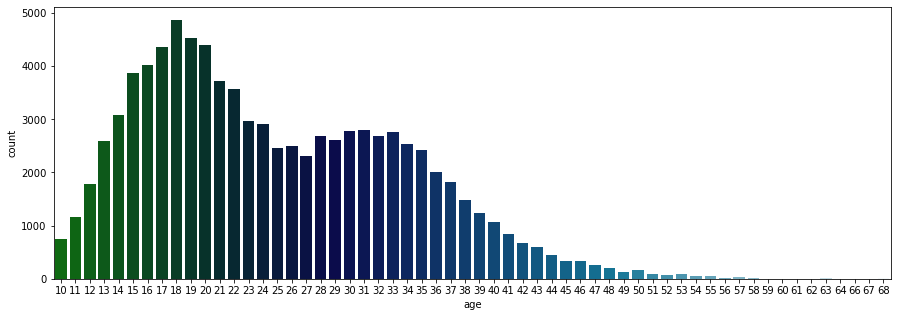

In [26]:
plt.figure(figsize=(15,5))
sns.countplot('age',data=train,palette='ocean')

we found that the data most user are in age group of 10 to 40

# bivariate 

In [27]:
pd.crosstab(dftrain['profession'],dftrain['engagement_score'])

engagement_score,0.00,0.02,0.40,0.42,0.45,0.69,0.86,1.09,1.10,1.15,...,4.90,4.91,4.92,4.93,4.94,4.95,4.96,4.97,4.98,5.00
profession,,,,,,,,,,,,,,,,,,,,,
Other,109,28,0,0,0,166,0,0,180,0,...,0,0,0,0,0,0,0,0,0,0
Student,0,0,189,28,0,0,0,272,0,0,...,271,237,149,95,75,53,40,52,26,196
Working Professional,89,0,0,0,94,0,117,0,0,174,...,0,0,0,0,0,0,0,0,0,0


Engagment score of students is high compared to others

# one hot encoding

In [28]:
for col in dftrain.select_dtypes(include='object').columns:
    print(col)
    print(train[col].unique())

gender
['Male' 'Female']
profession
['Student' 'Working Professional' 'Other']


In [29]:
for col in dftest.select_dtypes(include='object').columns:
    print(col)
    print(train[col].unique())

gender
['Male' 'Female']
profession
['Student' 'Working Professional' 'Other']


In [30]:
dftrain = pd.get_dummies(dftrain, columns = ['gender','profession' ])
dftest = pd.get_dummies(dftest, columns = ['gender','profession' ])

# Step 5: Building Model

In [31]:
dftrain.columns

Index(['category_id', 'video_id', 'age', 'followers', 'views',
       'engagement_score', 'gender_Female', 'gender_Male', 'profession_Other',
       'profession_Student', 'profession_Working Professional'],
      dtype='object')

In [32]:
# Seperate Features and Target
X= dftrain.drop(columns = ['engagement_score'], axis=1)
y= dftrain['engagement_score']

In [33]:
# 20% data as validation set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

Here we need to Predict Engagement score so we need to use Regression Models

# ML models

In [34]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

In [35]:
Algorithms = [LinearRegression(),  Ridge(), Lasso(),
          KNeighborsRegressor(), DecisionTreeRegressor()]
names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression',
         'K Neighbors Regressor', 'Decision Tree Regressor']

In [36]:
r2scorelist=[]

In [37]:
for name in Algorithms:
    model = name
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    r2= metrics.r2_score(y_test,y_pred)
    r2scorelist.append(r2)

In [38]:
evaluation = pd.DataFrame({'Model': names,
                           'R2score': r2scorelist})

In [39]:
evaluation

,Model,R2score
0,Linear Regression,0.277897
1,Ridge Regression,0.277897
2,Lasso Regression,0.047761
3,K Neighbors Regressor,0.245153
4,Decision Tree Regressor,0.159100


# MinMax Scaling

In [40]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

In [41]:
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

now let us find out separately

In [42]:
#linear Regression
lr=LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)
print(metrics.r2_score(y_test,pred))

-3.338904994725491e+20


In [43]:
#Ridge Regression
RR=Ridge()
RR.fit(X_train,y_train)
pred=RR.predict(X_test)
print(metrics.r2_score(y_test,pred))

0.278058505430701


In [44]:
#Lasso Regression
la=Lasso()
la.fit(X_train,y_train)
pred=la.predict(X_test)
print(metrics.r2_score(y_test,pred))

-4.122551297358612e-05


In [45]:
#KNeighborsRegressor()
KNN=KNeighborsRegressor()
KNN.fit(X_train,y_train)
pred=KNN.predict(X_test)
print(metrics.r2_score(y_test,pred))

0.2573215454995793


In [46]:
#'Decision Tree Regressor'
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)
pred=dt.predict(X_test)
print(metrics.r2_score(y_test,pred))

0.15842261197307317


In [122]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
pred=rf.predict(X_test)
print(metrics.r2_score(y_test,pred))

0.2420211472961824


In [121]:
pd.Series(rf.feature_importances_,index=X.columns).sort_values(ascending=False)*100
train['id']=train['category_id']+train['video_id']
train['viewid']=train['category_id']*train['views']

In [49]:
#sklearn.ensemble.GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
GBR=GradientBoostingRegressor()
GBR.fit(X_train,y_train)
pred=GBR.predict(X_test)
print(metrics.r2_score(y_test,pred))

0.3483141789191281


In [50]:
#xgboost
import xgboost as xg
train_dmatrix = xg.DMatrix(data = X_train, label = y_train)
test_dmatrix = xg.DMatrix(data = X_test, label = y_test)

In [51]:
xgb_r = xg.XGBRegressor()
xgb_r.fit(X_train,y_train)
pred=xgb_r.predict(X_test)
print(metrics.r2_score(y_test,pred))

0.36052913440872514


we found out that Random forest regression as the best fit model

# Fine Tuning of Hyperparameter

In [123]:
print(rf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [124]:
rft=RandomForestRegressor(n_estimators= 20,max_depth=2,random_state=42,warm_start=True,oob_score= True)

In [125]:
rft.fit(X_train,y_train)
pred=rft.predict(X_test)
print(metrics.r2_score(y_test,pred))

0.25436919502706756


In [126]:
eng_score=rft.predict(dftest)

In [127]:
eng_score

array([4.03254423, 4.03254423, 3.10725843, ..., 4.03254423, 3.53132931,
       3.53132931])

In [128]:
submit=pd.DataFrame({'row_id':test['row_id'],'engagement_score':eng_score})
submit.set_index('row_id',inplace=True)

In [129]:
submit

,engagement_score
row_id,
89198,4.032544
89199,4.032544
89200,3.107258
89201,4.032544
89202,3.107258
...,...
100314,4.032544
100315,3.603021
100316,4.032544


In [130]:
submit.to_csv(r'C:\Users\HP\Downloads\submission39.csv')